In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LinearRegression import  MyReg
from utils import CustomTrainTestSplit, CustomScaler

### Load and Preprocess the Data

In [38]:
# Load the dataset
file_path = 'height-weight.csv'
df = pd.read_csv(file_path)

# Split features and target
X = df[['Weight']].values
y = df['Height'].values


In [39]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0.5, 1.0, 'Scatter Plot of Weight vs Height')

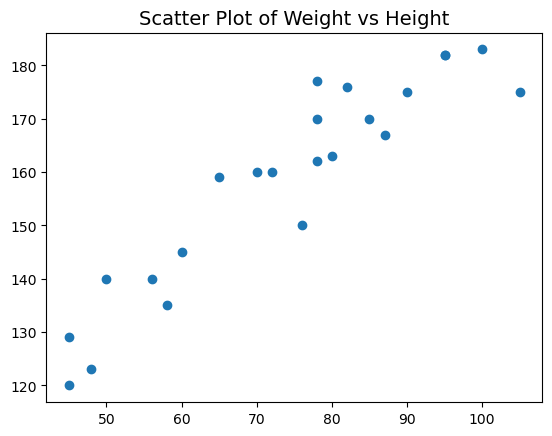

In [74]:
# Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.title('Scatter Plot of Weight vs Height', fontsize=14)

In [76]:

## Correlation 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


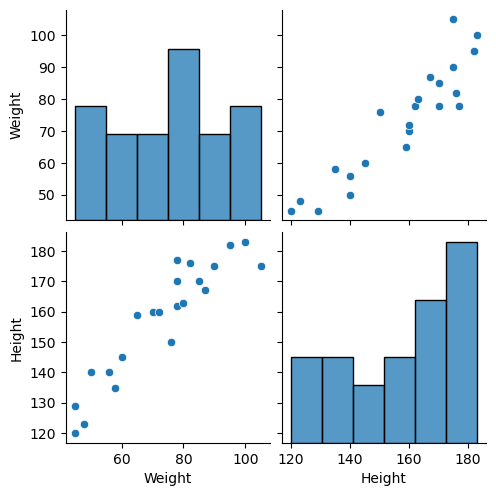

In [75]:
## Visualization
import seaborn as sns
sns.pairplot(df)

In [70]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test are ready to use


In [71]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaling the training data
X_test_scaled = scaler.transform(X_test)  # Scaling the test data


### Train the Model

In [94]:
# Initialize and train the custom Linear Regression model
model = MyReg(learning_rate=0.01, no_of_iterations=1000)
model.fit(X_train_scaled, y_train)

del_coeff: [-17.03440872], del_intercept: -157.5
After Update: Coeff: [0.17034409], Intercept: 1.575
del_coeff: [-16.86406463], del_intercept: -155.92500000000004
After Update: Coeff: [0.33898473], Intercept: 3.1342500000000006
del_coeff: [-16.69542399], del_intercept: -154.36575
After Update: Coeff: [0.50593897], Intercept: 4.677907500000001
del_coeff: [-16.52846975], del_intercept: -152.82209250000002
After Update: Coeff: [0.67122367], Intercept: 6.206128425000001
del_coeff: [-16.36318505], del_intercept: -151.293871575
After Update: Coeff: [0.83485552], Intercept: 7.719067140750001
del_coeff: [-16.1995532], del_intercept: -149.78093285925
After Update: Coeff: [0.99685105], Intercept: 9.2168764693425
del_coeff: [-16.03755767], del_intercept: -148.2831235306575
After Update: Coeff: [1.15722663], Intercept: 10.699707704649075
del_coeff: [-15.87718209], del_intercept: -146.80029229535094
After Update: Coeff: [1.31599845], Intercept: 12.167710627602585
del_coeff: [-15.71841027], del_inte

### Visualize Training Convergence

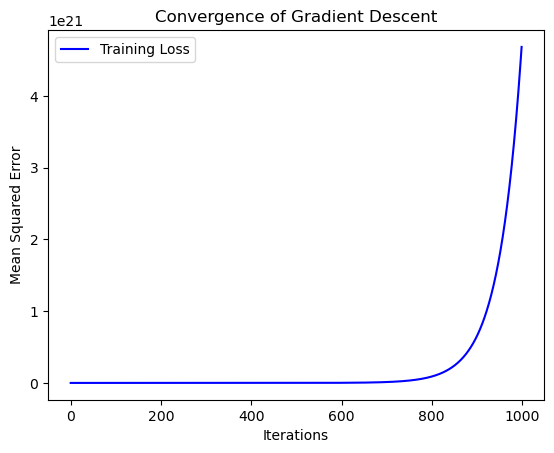

In [93]:
losses = []
for i in range(model.no_of_iterations):
    predictions = model.predict(X_train_scaled)
    loss = np.mean((y_train - predictions) ** 2)  # Mean Squared Error
    losses.append(loss)
    
    # Calculate gradients
    gradients = -2 * X_train_scaled.T.dot(y_train - predictions) / len(y_train)
    
    # Update weights (assuming a learning rate 'lr')
    model.coeff -= 0.01 * gradients
    model.intercept -= 0.01 * np.mean(y_train - predictions)


# Plot the training loss over iterations
plt.plot(range(len(losses)), losses, color='blue', label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.show()

### Evaluate the Model

In [55]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error on test data
mse_test = np.mean((y_test - y_pred)**2)
print(f'Mean Squared Error on Test Set: {mse_test}')

Mean Squared Error on Test Set: 109.86496163288794


### Converge Point of GD

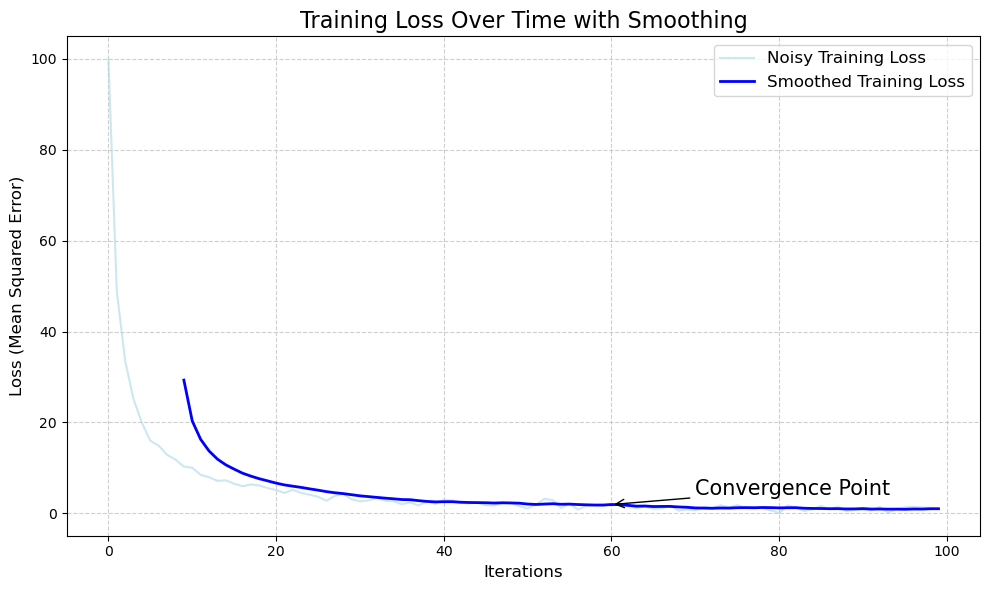

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated loss values that decrease over time with some noise
iterations = np.arange(100)
loss_values = 100 / (iterations + 1) + np.random.normal(0, 0.5, 100)  # Simulate some noise

# Apply a smoothing technique (moving average)
smooth_loss = np.convolve(loss_values, np.ones(10)/10, mode='valid')

# Plot the training loss
plt.figure(figsize=(10, 6))  # Set figure size

# Plot the noisy loss and smoothed loss
plt.plot(iterations, loss_values, color='lightblue', label='Noisy Training Loss', alpha=0.6)
plt.plot(iterations[9:], smooth_loss, color='blue', label='Smoothed Training Loss', linewidth=2)

# Add an annotation to indicate where the loss stabilizes
plt.annotate(
    'Convergence Point', 
    xy=(60, smooth_loss[60-9]), 
    xytext=(70, smooth_loss[60-9] + 2),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=15,
    color='black'
)

# Title, Labels, and Legend
plt.title('Training Loss Over Time with Smoothing', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend(fontsize=12)

# Grid and styling
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()


In [103]:
coeff = 17.03
intercept = 157.49

Predicted Equation:
The linear regression model has the following form:
Coefficient: 17.03 and Intercept: 157.49

𝑦 =17.03×X+157.49

Where:

#### y is the predicted value (dependent variable),
#### X is the input feature (independent variable)
#### 17.03 is the slope (coefficient),
#### 157.49 is the intercept.

#### For each unit increase in weight, the model predicts that height will increase by 17.03 units.